In [1]:
#Importing Libraries
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, Eq, Sum
from IPython.display import display, Markdown


## Step 1: Load and Preprocess the Dataset

In [3]:
#Loading and Preprocessing theDataset
#Loading and Preprocessing theDataset
data = pd.read_excel('Inventory.xlsx')

In [4]:
data

,Month,Demand,Storage Capacity,Initial Inventory,Product_ID,Product_Name
0,1,49,50,20,1,Berry Juice
1,2,34,50,20,1,Berry Juice
2,3,41,50,20,1,Berry Juice
3,4,26,50,20,1,Berry Juice
4,5,26,50,20,1,Berry Juice
...,...,...,...,...,...,...
395,96,45,70,28,4,Orange Soda
396,97,63,70,28,4,Orange Soda
397,98,36,70,28,4,Orange Soda
398,99,35,70,28,4,Orange Soda


In [5]:
#Displaying the first five rows
data.head()

,Month,Demand,Storage Capacity,Initial Inventory,Product_ID,Product_Name
0,1,49,50,20,1,Berry Juice
1,2,34,50,20,1,Berry Juice
2,3,41,50,20,1,Berry Juice
3,4,26,50,20,1,Berry Juice
4,5,26,50,20,1,Berry Juice


In [6]:
#Display last five rows
data.tail()

,Month,Demand,Storage Capacity,Initial Inventory,Product_ID,Product_Name
395,96,45,70,28,4,Orange Soda
396,97,63,70,28,4,Orange Soda
397,98,36,70,28,4,Orange Soda
398,99,35,70,28,4,Orange Soda
399,100,55,70,28,4,Orange Soda


In [7]:
# Display second, fourth, and another specific column
data.iloc[0:3, [0, 1,3,5, 2]]


,Month,Demand,Initial Inventory,Product_Name,Storage Capacity
0,1,49,20,Berry Juice,50
1,2,34,20,Berry Juice,50
2,3,41,20,Berry Juice,50


The above is showing the data for first three months for the product Berry Juice



In [8]:
#Display unique product names to verify
print("Products:", data['Product_Name'].unique())

Products: ['Berry Juice' 'Mango Smoothie' 'Apple Cider' 'Orange Soda']


In [13]:
#Type of Products and the list of unique products
products

array(['Berry Juice', 'Mango Smoothie', 'Apple Cider', 'Orange Soda'],
      dtype=object)

## Step 2: Understanding the formation of the Equation

In [15]:
# Define symbols for general symbolic representation
x_sym, I_sym, c_o_sym, c_h_sym, t = symbols('x_t I_t c_o c_h t')
T_sym = symbols('T')  # Symbolic T for general representation

In [16]:
display(Markdown("### Decision Variables"))
display(Markdown(f"1. Order Quantity in Month: $$ {x_sym} $$"))
display(Markdown(f"2. Inventory Level in Month: $$ {I_sym} $$"))

### Decision Variables

1. Order Quantity in Month: $$ x_t $$

2. Inventory Level in Month: $$ I_t $$

In [18]:
# Constraints (general symbolic representation)
inventory_balance_sym = Eq(I_sym, I_sym - 1 + x_sym)
storage_capacity_sym = Eq(I_sym, symbols('S'))

display(Markdown("### Constraints"))
display(Markdown(f"1. Inventory Balance: $$ {inventory_balance_sym} $$"))
display(Markdown(f"Inventory Balnce constraint: $$ I_{t} = I_{t-1} + x_{t} - d_{t} $$"))
display(Markdown(f"2. Storage Capacity: $$ {storage_capacity_sym} $$"))
display(Markdown("Storage Capacity constraint: $$ I_{t} \\leq S $$"))
display(Markdown("3. Non-Negativity: $$ x_t \\geq 0, I_t \\geq 0 $$"))

### Constraints

1. Inventory Balance: $$ Eq(I_t, I_t + x_t - 1) $$

Inventory Balnce constraint: $$ I_99 = I_98 + x_99 - d_99 $$

2. Storage Capacity: $$ Eq(I_t, S) $$

Storage Capacity constraint: $$ I_{t} \leq S $$

3. Non-Negativity: $$ x_t \geq 0, I_t \geq 0 $$

In [19]:
from sympy import symbols, Eq, Sum
from IPython.display import display, Markdown

# Define symbols for general symbolic representation
# Define a new symbol for the summation index to avoid conflict with the loop variable 't'
i = symbols('i')
x_sym, I_sym, c_o_sym, c_h_sym, t = symbols('x_t I_t c_o c_h t')
T_sym = symbols('T')  # Symbolic T for general representation

# Objective function (general)
# Use the new symbol 'i' for the summation index
objective_sym = Sum(c_o_sym * x_sym + c_h_sym * I_sym, (i, 1, T_sym))
from sympy import symbols, Eq, Sum
from IPython.display import display, Markdown

# Define symbols for general symbolic representation
# Define a new symbol for the summation index to avoid conflict with the loop variable 't'
i = symbols('i')
x_sym, I_sym, c_o_sym, c_h_sym, t = symbols('x_t I_t c_o c_h t')
T_sym = symbols('T')  # Symbolic T for general representation

# Objective function (general)
# Use the new symbol 'i' for the summation index
objective_sym = Sum(c_o_sym * x_sym + c_h_sym * I_sym, (i, 1, T_sym))
display(Markdown("### Objective Function"))
display(Markdown(f"Minimize: $$ {objective_sym} $$"))
display(Markdown("Total Cost : $$\sum_{t=1}^{T} ((Holding_Cost_per_unit * I_{t} + Ordering_Cost_per_unit * x_{t})) $$"))
display(Markdown("Objective Function: $$ \sum_{t=1}^{T} (c_{o} x_{t} + c_{h} I_{t}) $$"))

### Objective Function

Minimize: $$ Sum(I_t*c_h + c_o*x_t, (i, 1, T)) $$

Total Cost : $$\sum_{t=1}^{T} ((Holding_Cost_per_unit * I_{t} + Ordering_Cost_per_unit * x_{t})) $$

Objective Function: $$ \sum_{t=1}^{T} (c_{o} x_{t} + c_{h} I_{t}) $$

In [20]:
#Displaying the entire problem
display(Markdown("### Decision Variables"))
display(Markdown(f"1. Order Quantity in Month: $$ {x_sym} $$"))
display(Markdown(f"2. Inventory Level in Month: $$ {I_sym} $$"))

# Constraints (general symbolic representation)
inventory_balance_sym = Eq(I_sym, I_sym - 1 + x_sym)
storage_capacity_sym = Eq(I_sym, symbols('S'))

display(Markdown("### Constraints"))
display(Markdown(f"1. Inventory Balance: $$ {inventory_balance_sym} $$"))
display(Markdown(f"Inventory Balnce constraint: $$ I_{t} = I_{t-1} + x_{t} - d_{t} $$"))
display(Markdown(f"2. Storage Capacity: $$ {storage_capacity_sym} $$"))
display(Markdown("Storage Capacity constraint: $$ I_{t} \\leq S $$"))
display(Markdown("3. Non-Negativity: $$ x_t \\geq 0, I_t \\geq 0 $$"))

# Define symbols for general symbolic representation
# Define a new symbol for the summation index to avoid conflict with the loop variable 't'
i = symbols('i')
x_sym, I_sym, c_o_sym, c_h_sym, t = symbols('x_t I_t c_o c_h t')
T_sym = symbols('T')  # Symbolic T for general representation

# Objective function (general)
# Use the new symbol 'i' for the summation index
objective_sym = Sum(c_o_sym * x_sym + c_h_sym * I_sym, (i, 1, T_sym))
from sympy import symbols, Eq, Sum
from IPython.display import display, Markdown

# Define symbols for general symbolic representation
# Define a new symbol for the summation index to avoid conflict with the loop variable 't'
i = symbols('i')
x_sym, I_sym, c_o_sym, c_h_sym, t = symbols('x_t I_t c_o c_h t')
T_sym = symbols('T')  # Symbolic T for general representation

# Objective function (general)
# Use the new symbol 'i' for the summation index
objective_sym = Sum(c_o_sym * x_sym + c_h_sym * I_sym, (i, 1, T_sym))
display(Markdown("### Objective Function"))
display(Markdown(f"Minimize: $$ {objective_sym} $$"))
display(Markdown("Total Cost : $$\sum_{t=1}^{T} ((Holding_Cost_per_unit * I_{t} + Ordering_Cost_per_unit * x_{t})) $$"))
display(Markdown("Objective Function: $$ \sum_{t=1}^{T} (c_{o} x_{t} + c_{h} I_{t}) $$"))

### Decision Variables

1. Order Quantity in Month: $$ x_t $$

2. Inventory Level in Month: $$ I_t $$

### Constraints

1. Inventory Balance: $$ Eq(I_t, I_t + x_t - 1) $$

Inventory Balnce constraint: $$ I_t = I_t - 1 + x_t - d_t $$

2. Storage Capacity: $$ Eq(I_t, S) $$

Storage Capacity constraint: $$ I_{t} \leq S $$

3. Non-Negativity: $$ x_t \geq 0, I_t \geq 0 $$

### Objective Function

Minimize: $$ Sum(I_t*c_h + c_o*x_t, (i, 1, T)) $$

Total Cost : $$\sum_{t=1}^{T} ((Holding_Cost_per_unit * I_{t} + Ordering_Cost_per_unit * x_{t})) $$

Objective Function: $$ \sum_{t=1}^{T} (c_{o} x_{t} + c_{h} I_{t}) $$

## Step 3: Define the Linear Programming Problem and solving using optimization

In [9]:
# Define constants
T = data['Month'].max()  # Number of months
demand = data['Demand'].values  # Monthly demand
initial_inventory = data['Initial Inventory'].iloc[0]  # Starting inventory
c_o = 2  # Ordering cost per unit (customize if dataset has this value)
c_h = 1  # Holding cost per unit per month (customize if dataset has this value)
S = 50  # Storage capacity (customize if dataset has this value)


In [10]:
print("Initail Inventory :",initial_inventory)
print("Demand :",demand)
print("Ordering Cost :",c_o)
print("Holding Cost :",c_h)
print("Storage Capacity :",S)


Initail Inventory : 20
Demand : [49 34 41 26 26 34 29 48 36 45 32 37 42 41 28 29 40 52 39 52 42 42 38 28
 39 42 37 36 43 43 34 49 41 28 43 42 26 39 34 29 42 38 31 28 35 30 31 50
 47 30 28 29 47 40 51 30 49 40 41 50 43 41 48 43 26 43 42 48 32 30 38 39
 36 46 47 40 34 50 27 46 49 49 42 43 39 41 36 48 42 31 43 42 52 35 26 48
 40 26 32 29 27 66 27 65 37 44 37 36 51 56 44 52 50 46 61 64 59 53 45 30
 58 35 25 37 62 48 26 36 49 58 49 39 65 38 38 36 49 35 53 49 54 35 53 59
 25 58 65 67 40 28 25 41 26 64 40 50 55 67 65 44 25 55 42 36 63 43 63 25
 66 62 39 63 50 25 52 53 62 34 46 44 36 30 58 39 52 63 53 52 65 56 65 26
 32 60 49 65 62 29 27 38 70 53 34 62 51 52 49 38 39 70 51 68 40 72 48 60
 33 32 74 34 48 51 50 45 67 61 71 39 67 68 65 44 66 49 70 37 60 47 47 53
 35 69 51 30 54 45 69 66 66 37 72 60 34 31 52 69 58 67 49 52 58 40 69 56
 34 63 59 60 65 34 74 57 41 36 59 59 64 73 64 61 72 33 71 34 48 67 44 74
 30 40 33 68 62 54 31 32 47 53 44 34 21 31 40 22 57 51 51 64 38 34 48 25
 64 61 24 51 43 53 

In [17]:
# Define Constraints
constraints = []
constraints.append(I[0] == initial_inventory + x[0] - demand[0])  # Initial inventory balance
for t in range(1, T):
    # Inventory balance for subsequent months
    constraints.append(I[t] == I[t-1] + x[t] - demand[t])
    # Storage capacity constraint
    constraints.append(I[t] <= S)
    constraints.append(I[t] >= 0)
    constraints.append(x[t] >= 0)

In [24]:
import cvxpy as cp

# Initialize storage for results
results = {}

# Loop through each product and apply the optimization model
products = data['Product_Name'].unique()

#Iterating for each product i.e for Berry Juice, Manago Smoothie and others
for product in products:
    # Filter product data for the current product  i.e for Berry Juice, Manago Smoothie and others
    product_data = data[data['Product_Name'] == product]
    # Filter product demand data for the current product  i.e for Berry Juice, Manago Smoothie and others
    demand = product_data['Demand'].values
    # Filter product storage capacity data for the current product  i.e for Berry Juice, Manago Smoothie and others
    storage_capacity = product_data['Storage Capacity'].iloc[0]
    # Filter product initial inventory data for the current product  i.e for Berry Juice, Manago Smoothie and others
    initial_inventory = product_data['Initial Inventory'].iloc[0]

    # Define the optimization problem
    #Total number of months for current product i.e for Berry Juice, Manago Smoothie and others
    T = len(demand)
    # Order quantities for each product in that particular month
    x = cp.Variable(T, integer=True)
    # Inventory levels for each product in that particular month
    I = cp.Variable(T, integer=True)
    # Total cost: ordering cost per unit * number of units ordered + holding cost per unit * nuber of units stored in the inventory
    total_cost = cp.sum(c_o * x + c_h * I)
    #Defining Constraints
    constraints = [
        #For first month
        #Current Inventory = initail inventory of that month + order quantity of that month - demand of that month
        I[0] == initial_inventory + x[0] - demand[0],
        # Inventory cannot be negative
        I >= 0,
        # Inventory should be within storage limits
        #Inventory of the current month = Inventory of Previous Month + Order Quantity of the current month - Demand of the current month
        I <= storage_capacity,
    ] + [I[t] == I[t - 1] + x[t] - demand[t] for t in range(1, T)]
    #Formulation of the objective function
    # Our main aim is to  minimize total order quantities
    objective = cp.Minimize(total_cost)

    # Solve the optimization problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

     # Store results
    results[product] = {
        'Order Quantities': x.value,
        'Inventory Levels': I.value,
        'Demand': demand,
        'Total Cost': prob.value,
    }

print("Optimization with cost minimization complete")
#Defining Variables for LP Model
x = cp.Variable(T, nonneg=True)  # Order quantities (decision variable)
I = cp.Variable(T, nonneg=True)  # Inventory levels at the end of each period

Optimization with cost minimization complete


## Step 3: Showcasing the results

In [26]:
# Display results for each product
for product, result in results.items():
    # Display results
    print(f"Results for {product}:")
    print("Optimal Order Quantities:", result['Order Quantities'].round(2))
    print("Optimal Inventory Levels:", result['Inventory Levels'].round(2))
    print(f"Total Orders: {result['Order Quantities'].sum():.2f}")
    print(f"Average Inventory Level: {result['Inventory Levels'].mean():.2f}")
    print(f"Total Cost: {result['Total Cost']:.2f}\n")

Results for Berry Juice:
Optimal Order Quantities: [29. 34. 41. 26. 26. 34. 29. 48. 36. 45. 32. 37. 42. 41. 28. 29. 40. 52.
 39. 52. 42. 42. 38. 28. 39. 42. 37. 36. 43. 43. 34. 49. 41. 28. 43. 42.
 26. 39. 34. 29. 42. 38. 31. 28. 35. 30. 31. 50. 47. 30. 28. 29. 47. 40.
 51. 30. 49. 40. 41. 50. 43. 41. 48. 43. 26. 43. 42. 48. 32. 30. 38. 39.
 36. 46. 47. 40. 34. 50. 27. 46. 49. 49. 42. 43. 39. 41. 36. 48. 42. 31.
 43. 42. 52. 35. 26. 48. 40. 26. 32. 29.]
Optimal Inventory Levels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Total Orders: 3854.00
Average Inventory Level: 0.00
Total Cost: 7708.00

Results for Mango Smoothie:
Optimal Order Quantities: [ 2. 66. 27. 65. 37. 44. 37. 36. 51. 56. 44. 52. 50. 46. 61. 64. 59. 53.
 45. 30. 5

For Each Product:
*   Displays the optimal order quantities ( x ).
*   Displays the optimized inventory levels ( I ).
*   Sums up total orders across all months.
*   Calculates the average inventory level.
*   Outputs the total cost of managing inventory for the product.









## Step 4: Visualize the Results

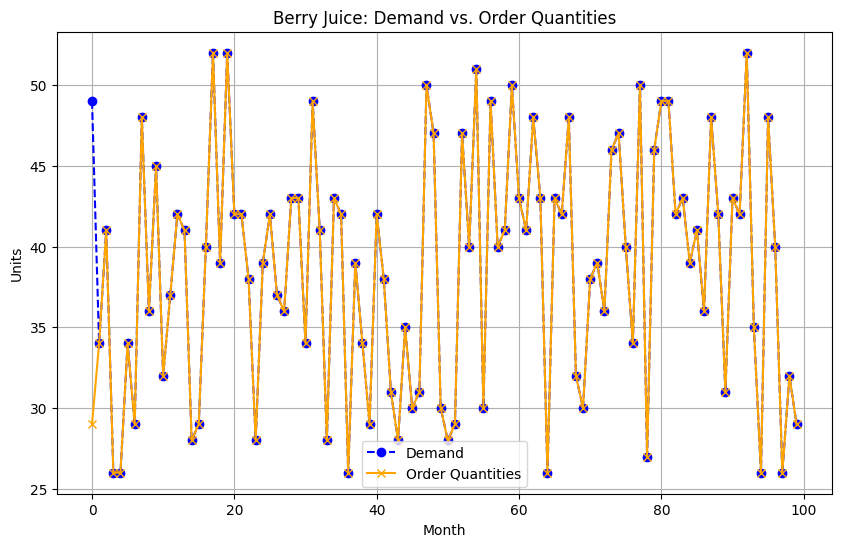

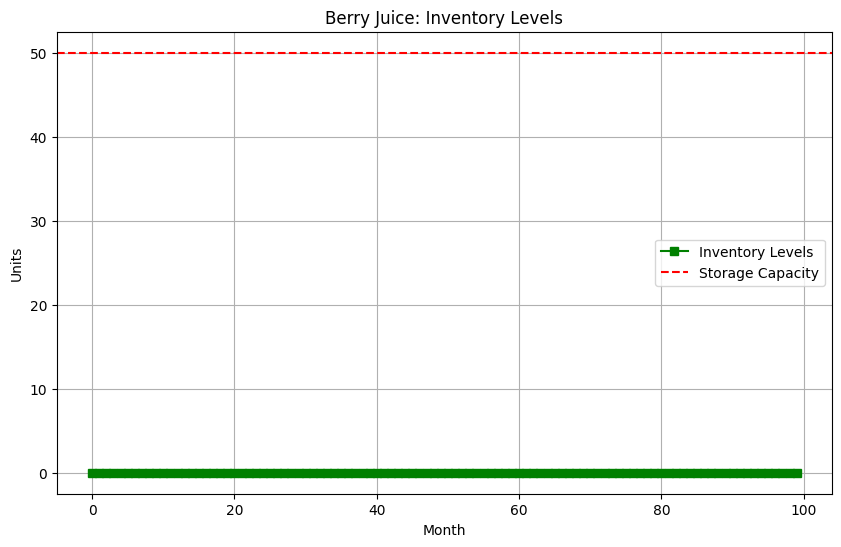

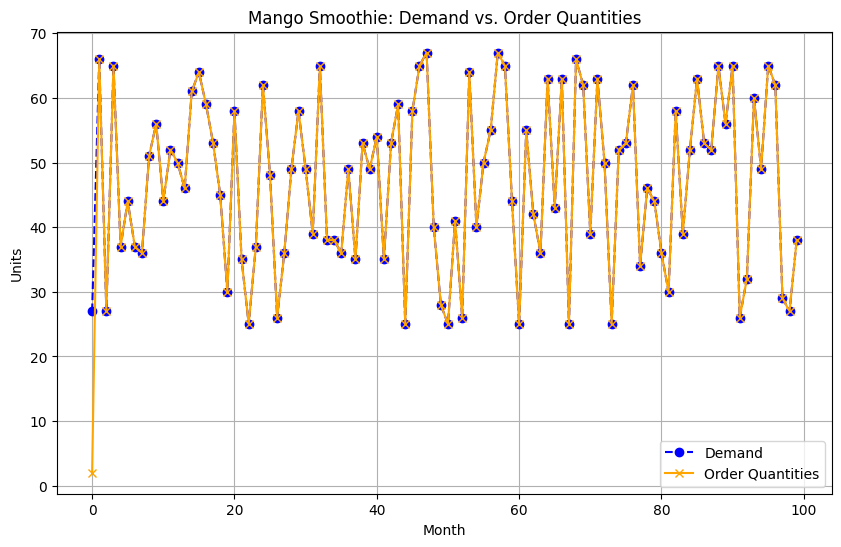

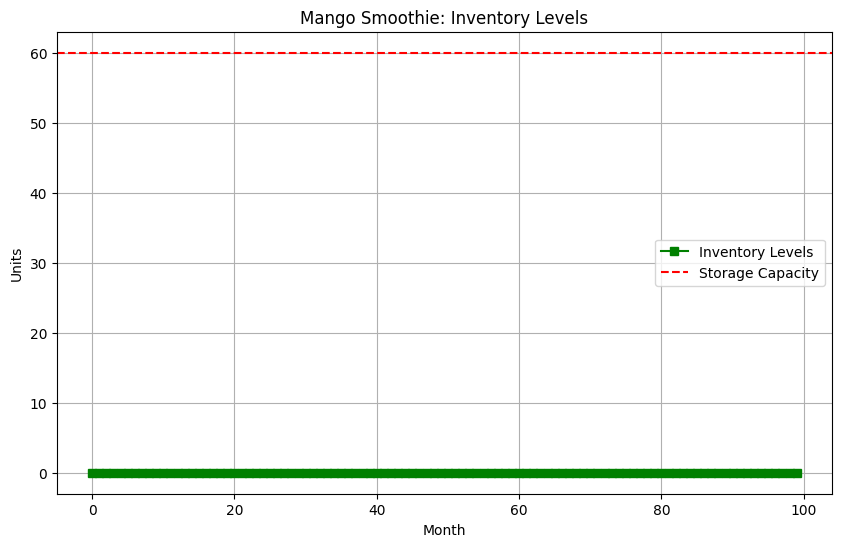

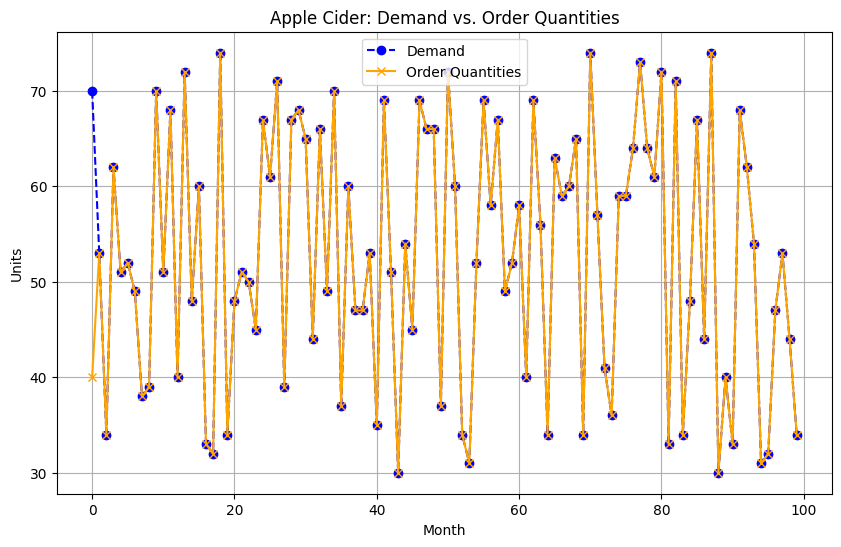

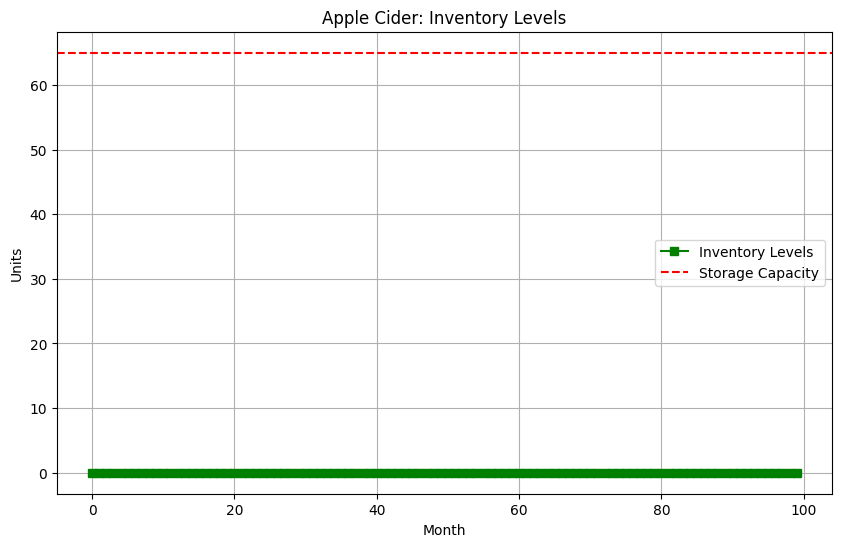

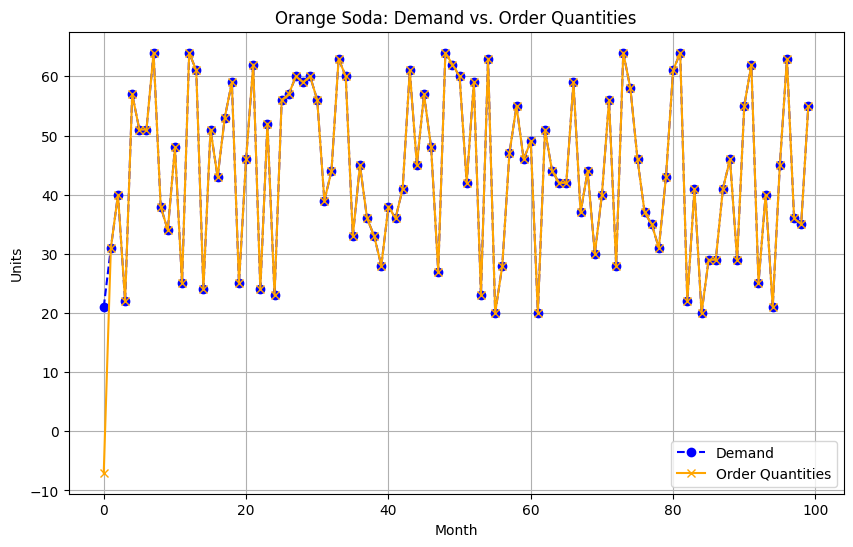

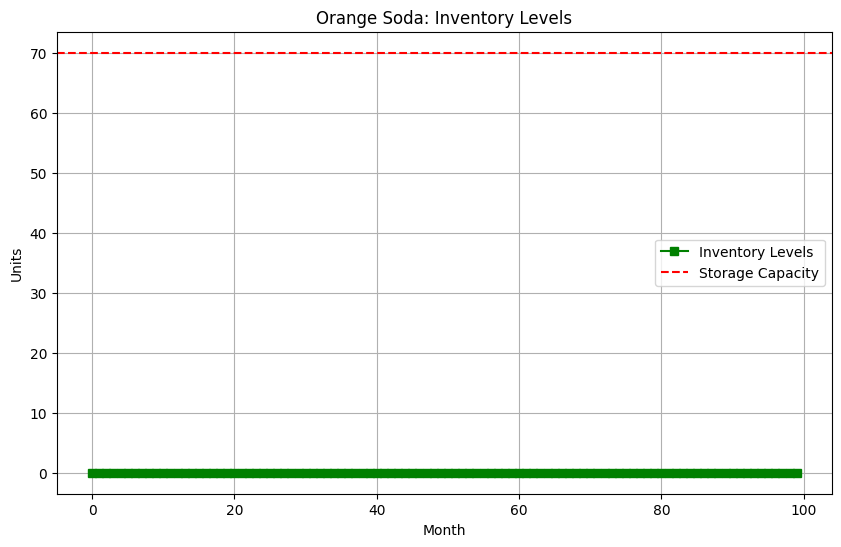

In [27]:
import matplotlib.pyplot as plt

# Create visualizations for each product
for product, result in results.items():
    # Demand vs. Order Quantities
    plt.figure(figsize=(10, 6))
    plt.plot(result['Demand'], label="Demand", linestyle="--", marker="o", color="blue")
    plt.plot(result['Order Quantities'], label="Order Quantities", marker="x", color="orange")
    plt.title(f"{product}: Demand vs. Order Quantities")
    plt.xlabel("Month")
    plt.ylabel("Units")
    plt.legend()
    plt.grid()
    # Save the chart as an image
    plt.savefig(f"{product}_Demand_vs_Order.png")
    plt.show()

    # Inventory Trends
    plt.figure(figsize=(10, 6))
    plt.plot(result['Inventory Levels'], label="Inventory Levels", color="green", marker="s")
    plt.axhline(y=data[data['Product_Name'] == product]['Storage Capacity'].iloc[0],
                color="red", linestyle="--", label="Storage Capacity")
    plt.title(f"{product}: Inventory Levels")
    plt.xlabel("Month")
    plt.ylabel("Units")
    plt.legend()
    plt.grid()
    # Save the chart as an image
    plt.savefig(f"{product}_Inventory_Levels.png")
    plt.show()

Demand vs. Order Quantities:

*   A line chart comparing the product’s monthly demand and optimized order quantities.
*   Highlights how the optimization aligns order quantities with demand.

Inventory Trends:

*   A line chart of the product’s inventory levels across the months.
*   Includes a horizontal line indicating the storage capacity constraint.

File Saving:


*   Each chart is saved with filenames like Berry Juice_Demand_vs_Order.png and Berry Juice_Inventory_Levels.png.



## Step 5: Exporting the data into a new csv file

In [28]:
# Create a combined DataFrame to export results
export_data = []

for product, result in results.items():
    product_data = pd.DataFrame({
        'Product': [product] * len(result['Demand']),
        'Month': range(1, len(result['Demand']) + 1),
        'Demand': result['Demand'],
        'Order Quantity': result['Order Quantities'].round(2),
        'Ending Inventory': result['Inventory Levels'].round(2),
        'Total Cost': [result['Total Cost']] * len(result['Demand'])  # Total cost repeated for all months
    })
    export_data.append(product_data)

# Combine data for all products
export_results = pd.concat(export_data, ignore_index=True)

# Save the results to a CSV file
export_results.to_csv('optimal_inventory_control_results.csv', index=False)

print("Results saved to 'optimal_inventory_control_results.csv'.")

Results saved to 'optimal_inventory_control_results.csv'.


The above code combines Data for all products:
*   For each product, it collects the month, demand, order quantities, ending inventory levels, and total cost.
*   Appends all products’ data into a single DataFrame.

After this, the results are saved into the csv file and the file is exported and saved